# Regression between sea level height and the nearest wind stress data point for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point is used to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [118]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

model = 'NearestPoint'

begin = 1850
end = 2014
period = f'{begin}-{end}'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [119]:
# Open data file
tg_data = imprt.import_obs_slh_data()

tg_data = tg_data.loc[begin:end]

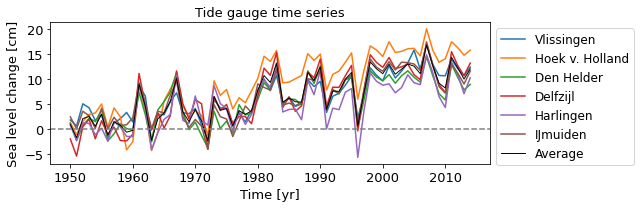

In [120]:
figs.plot_tg_data(tg_data, period = period)

#### Import and plot nearby wind data

In [121]:
wind_data_era5 = imprt.import_obs_wind_data(model = model, data_type = 'era5')

wind_data_era5 = wind_data_era5.loc[begin:end]

In [122]:
wind_data_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,4.733644,6.345675,9.164554,4.467730,9.251664,7.574831,6.923017,2.731458,3.180596,3.728501,2.347318,3.640278,3.380980,3.168188
1951,2.215220,3.094227,5.129766,2.236026,5.331681,3.909268,3.652698,4.189133,4.875644,6.217201,3.186954,5.968407,5.261225,4.949761
1952,3.140214,4.201388,7.262647,4.415530,7.962423,5.366155,5.391393,0.754191,0.748247,0.540864,0.772860,0.559152,0.670609,0.674321
1953,2.692977,3.829823,6.808114,3.867173,7.285601,4.985612,4.911550,1.657496,1.953852,2.634877,1.436066,2.553662,2.212620,2.074762
1954,8.065403,10.580028,14.525902,6.000999,13.994984,12.414601,10.930320,1.852473,2.051144,2.859851,2.762965,3.115296,2.352618,2.499058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,1.504010,1.694752,1.581436,0.749278,1.609742,1.630815,1.461672,-1.040227,-1.320386,-1.641536,-0.923076,-1.713503,-1.396766,-1.339249
2011,5.286091,7.165617,10.643063,4.800907,10.412738,8.663867,7.828714,2.349013,2.824203,4.121660,2.893656,4.195945,3.207230,3.265284


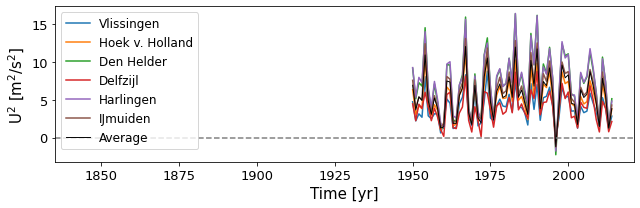

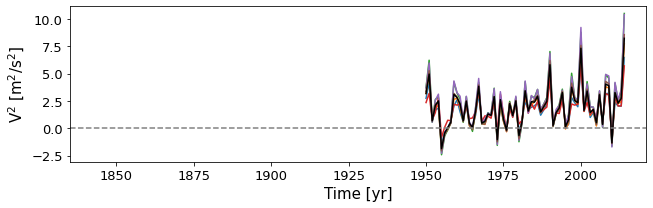

In [123]:
figs.plot_obs_wind_data(wind_data_era5, model, data_type = 'era5', title = False, period = period)

#### Plot data locations

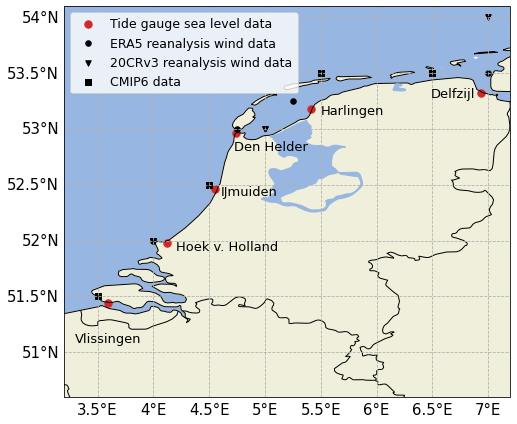

In [124]:
figs.plot_np_locations(title = False, period = period)

### Perform regression

In [125]:
results_era5, timeseries_era5, significance_era5, r2_df = regres.regression_obs(wind_data_era5, tg_data, wind_model = model, 
                                                                         data_type = 'era5', period = period)

In [126]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.715805,0.079581,0.102291,0.05487,0.630878,0.701828,0.034315,0.058141,0.008388,0.612725
Hoek v. Holland,0.868906,0.109524,0.150973,0.045129,0.73039,0.862458,0.06573,0.109218,-0.001832,0.71713
Den Helder,0.766957,0.266251,0.28501,0.053334,0.519378,0.755496,0.230165,0.249847,0.006777,0.49574
Delfzijl,0.806241,0.242575,0.257024,0.067185,0.586741,0.796712,0.205325,0.220485,0.021309,0.566417
Harlingen,0.759699,0.366453,0.376517,0.057481,0.417836,0.747881,0.335294,0.345854,0.011127,0.389205
IJmuiden,0.713998,0.162737,0.17285,0.071545,0.563121,0.699933,0.12156,0.13217,0.025883,0.541635
Average,0.829843,0.211411,0.235983,0.062506,0.624147,0.821474,0.172627,0.198409,0.0164,0.605663


In [127]:
results_era5

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.715805,0.079581,0.102291,0.054870,2.405900,6.533938,1.354288,-0.265088,3.600015
Hoek v. Holland,0.868906,0.109524,0.150973,0.045129,2.234519,9.038244,2.356818,-0.728385,5.384154
Den Helder,0.766957,0.266251,0.285010,0.053334,2.238317,5.583811,2.337727,-0.247657,3.282007
Delfzijl,0.806241,0.242575,0.257024,0.067185,2.515319,6.477859,2.725002,-0.240282,4.292304
Harlingen,0.759699,0.366453,0.376517,0.057481,2.304946,4.942971,2.772778,-0.151319,2.950151
IJmuiden,0.713998,0.162737,0.172850,0.071545,2.556090,6.419811,1.879136,-0.120248,3.549425
Average,0.829843,0.211411,0.235983,0.062506,2.019235,6.499439,2.266501,-0.320782,3.849649


In [128]:
timeseries_era5

Vlissingen                                          Hoek v. Holland  \
          u$^2$     v$^2$     trend     total wind total           u$^2$   
time                                                                       
1950   0.576749 -0.204927 -6.140207 -5.768385   0.371822        1.119426   
1951  -1.182293 -0.474778 -5.948325 -7.605396  -1.657071       -1.832478   
1952  -0.536213  0.161112 -5.756444 -6.131545  -0.375101       -0.827316   
1953  -0.848595 -0.006111 -5.564562 -6.419268  -0.854706       -1.164650   
1954   2.903879 -0.042206 -5.372681 -2.511008   2.861673        4.963684   
...         ...       ...       ...       ...        ...             ...   
2010  -1.679051  0.493302  5.372681  4.186932  -1.185749       -3.103025   
2011   0.962615 -0.134127  5.564562  6.393050   0.828488        1.863831   
2012   0.012305 -0.076280  5.756444  5.692469  -0.063975       -0.186922   
2013  -1.884840 -0.072854  5.948325  3.990632  -1.957693       -3.412437   
2014  -0.744155 -0.897066  6.140207  4.498986  -1.641221       -1.209211   

                                                ...  IJmuiden            \
         v$^2$     trend      total wind total  ...     u$^2$     v$^2$   
time                                            ...                       
1950 -0.573825 -9.183243  -8.637643   0.545601  ...  0.919447 -0.088325   
1951 -1.280892 -8.896267 -12.009637  -3.113370  ... -1.298946 -0.205434   
1952  0.440797 -8.609291  -8.995810  -0.386519  ... -0.417241  0.080489   
1953 -0.062105 -8.322314  -9.549069  -1.226755  ... -0.647545 -0.015554   
1954 -0.102689 -8.035338  -3.174343   4.860995  ...  3.848468 -0.024274   
...        ...       ...        ...        ...  ...       ...       ...   
2010  1.303699  8.035338   6.236012  -1.799326  ... -2.677862  0.209254   
2011 -0.425160  8.322314   9.760985   1.438670  ...  1.578529 -0.077503   
2012 -0.180745  8.609291   8.241624  -0.367667  ... -0.185939 -0.024097   
2013 -0.261472  8.896267   5.222358  -3.673909  ... -2.919567 -0.054779   
2014 -2.464906  9.183243   5.509126  -3.674117  ... -1.061674 -0.410855   

                                      Average                                \
         trend     total wind total     u$^2$     v$^2$     trend     total   
time                                                                          
1950 -6.053920 -5.222798   0.831122  1.048158 -0.216339 -6.565983 -5.734164   
1951 -5.864735 -7.369116  -1.504381 -1.537935 -0.532666 -6.360796 -8.431398   
1952 -5.675550 -6.012302  -0.336752 -0.163015  0.226459 -6.155609 -6.092165   
1953 -5.486365 -6.149464  -0.663099 -0.542464 -0.022196 -5.950422 -6.515082   
1954 -5.297180 -1.472986   3.824194  4.217042 -0.097532 -5.745235 -1.625725   
...        ...       ...        ...       ...       ...       ...       ...   
2010  5.297180  2.828571  -2.468609 -3.270548  0.583979  5.745235  3.058666   
2011  5.486365  6.987392   1.501027  1.764363 -0.233579  5.950422  7.481206   
2012  5.675550  5.465513  -0.210037 -0.064030 -0.060215  6.155609  6.031365   
2013  5.864735  2.890388  -2.974346 -3.433463 -0.135573  6.360796  2.791760   
2014  6.053920  4.581391  -1.472529 -1.392531 -1.113545  6.565983  4.059908   

                 
     wind total  
time             
1950   0.831819  
1951  -2.070602  
1952   0.063445  
1953  -0.564660  
1954   4.119510  
...         ...  
2010  -2.686570  
2011   1.530784  
2012  -0.124244  
2013  -3.569037  
2014  -2.506076  

[65 rows x 35 columns]

In [129]:
significance_era5

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,False,False,False,True,False,True,True
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

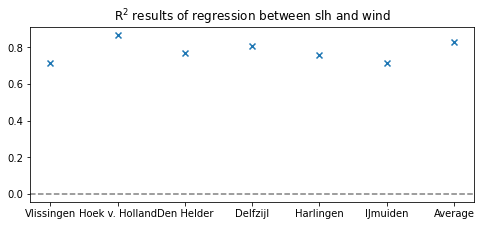

In [130]:
figs.plot_obs_result_per_station(results_era5, 'R$^2$', model, 'era5', period = period)

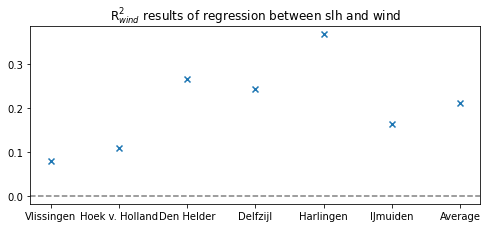

In [131]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{wind}$', model, 'era5', period = period)

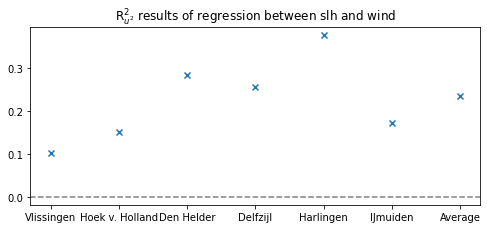

In [132]:
figs.plot_obs_result_per_station(results_era5,'R$^2_{u^2}$', model, 'era5', period = period)

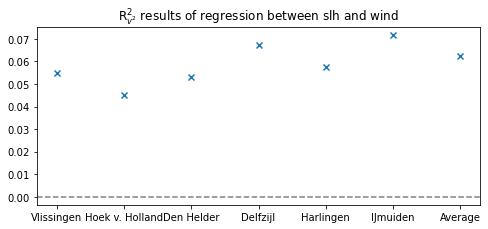

In [133]:
figs.plot_obs_result_per_station(results_era5, 'R$^2_{v^2}$', model, 'era5', period = period)

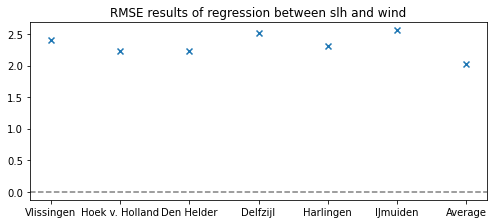

In [134]:
figs.plot_obs_result_per_station(results_era5, 'RMSE', model, 'era5', period = period)

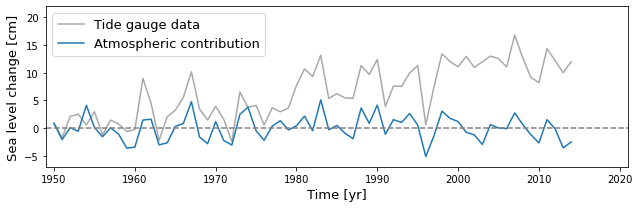

In [135]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

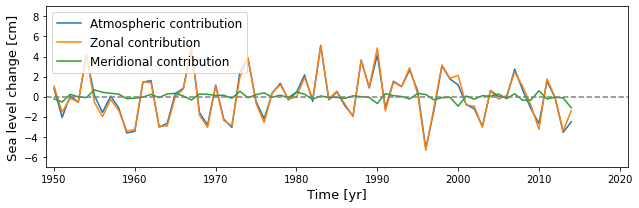

In [136]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_era5, 'Average', model, 'era5', title = False, period = period)

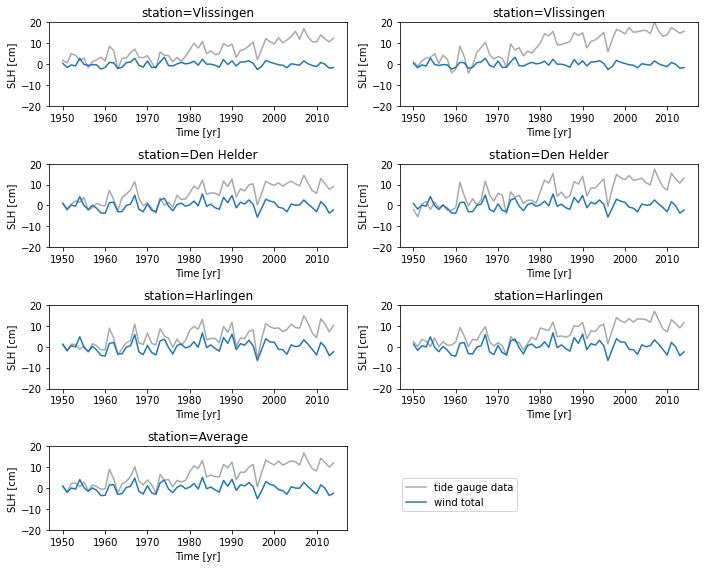

In [137]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['wind total'], model, 'era5', period = period)

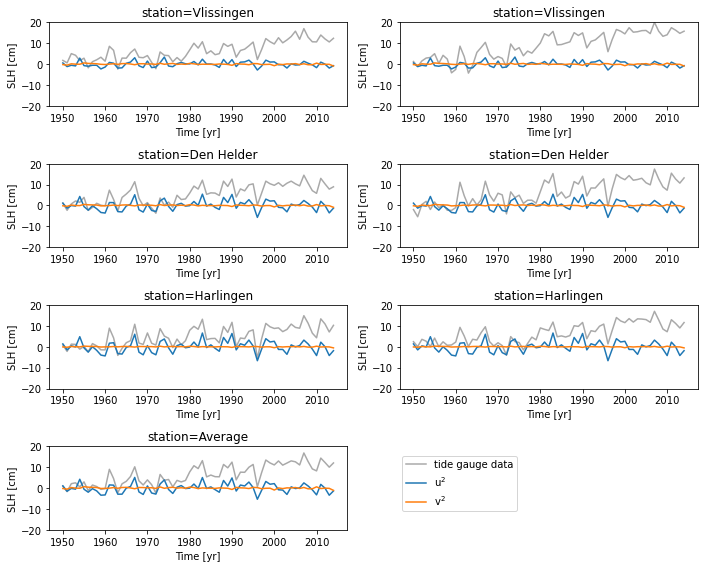

In [138]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$'], model, 'era5', period = period)

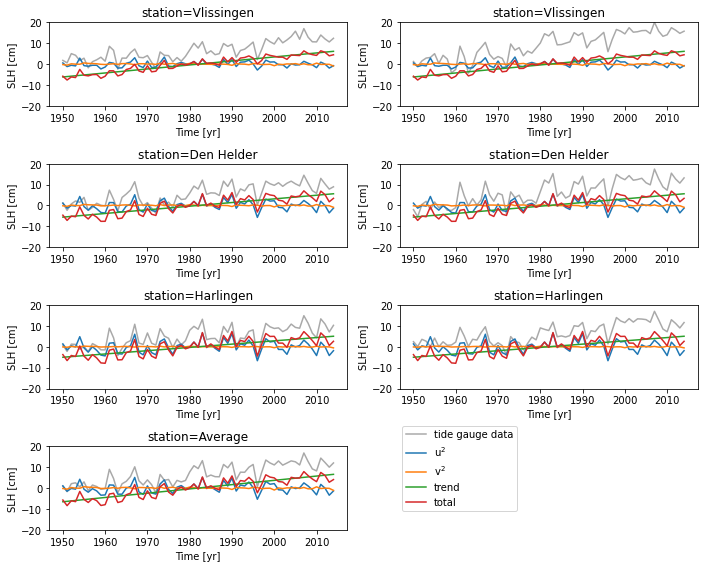

In [139]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_era5, ['u$^2$', 'v$^2$', 'trend', 'total'], model, 'era5', period = period)

#### Plot trends

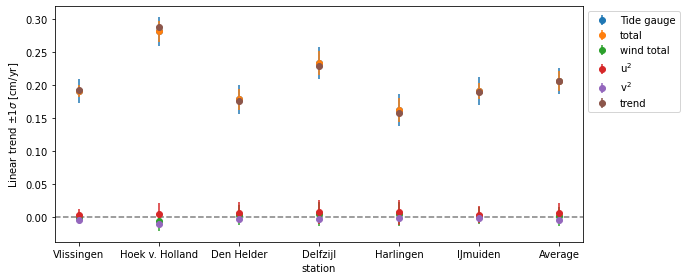

In [140]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], 
                                            model, 'era5', period = period)

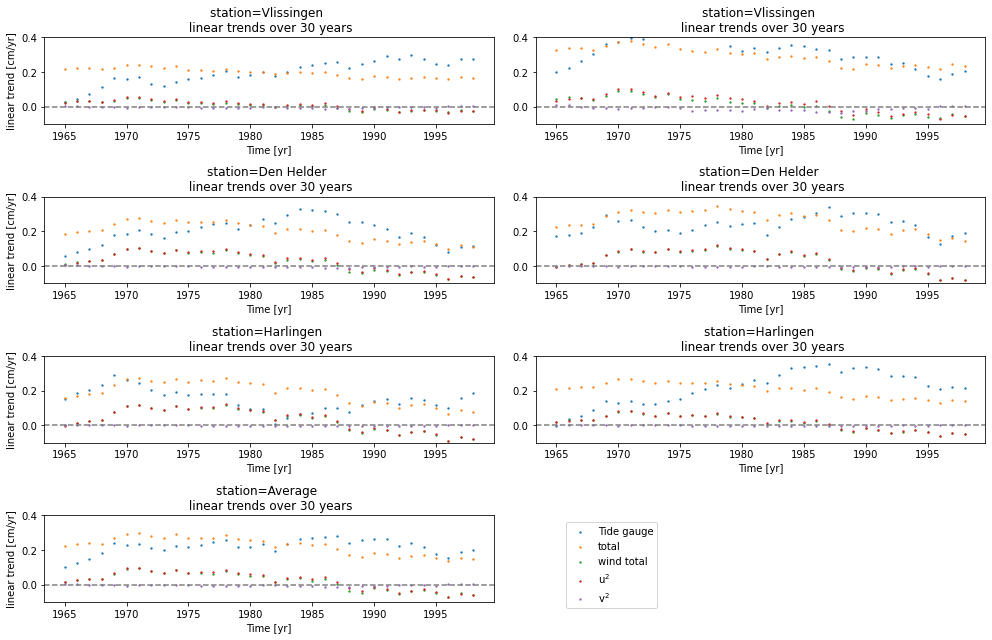

In [141]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_era5, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, 
                                                    model, 'era5', errorbar = False, period = period)

## 20cr observational data

#### Import and plot tide gauge data

In [142]:
# Open data file
tg_data = imprt.import_obs_slh_data(data_type = '20cr')

tg_data = tg_data.loc[begin:end]

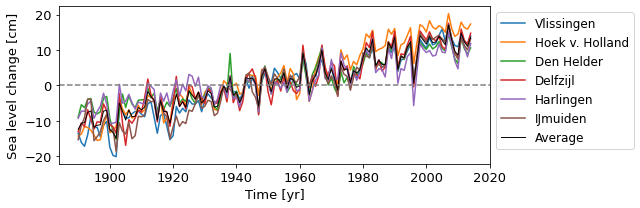

In [143]:
figs.plot_tg_data(tg_data, title = False, period = period)

#### Import and plot nearby wind data

In [144]:
wind_data_20cr = imprt.import_obs_wind_data(model = model, data_type = '20cr')

wind_data_20cr = wind_data_20cr.loc[begin:end]

In [145]:
wind_data_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1850,6.595366,6.595366,9.109803,10.060366,9.109803,6.595366,8.011012,0.816459,0.816459,0.537151,0.286682,0.537151,0.816459,0.635060
1851,2.673661,2.673661,3.273753,3.489924,3.273753,2.673661,3.009736,1.764669,1.764669,1.816868,1.829573,1.816868,1.764669,1.792886
1852,3.651133,3.651133,3.659409,2.712696,3.659409,3.651133,3.497485,4.838133,4.838133,4.819138,4.277320,4.819138,4.838133,4.738332
1853,1.348166,1.348166,1.260514,1.104853,1.260514,1.348166,1.278396,1.093869,1.093869,1.216286,1.292417,1.216286,1.093869,1.167766
1854,7.457607,7.457607,9.626811,10.087348,9.626811,7.457607,8.618966,1.006250,1.006250,0.777810,0.660357,0.777810,1.006250,0.872455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,1.780331,1.780331,2.015964,2.110023,2.015964,1.780331,1.913824,-0.729672,-0.729672,-1.104226,-1.133190,-1.104226,-0.729672,-0.921776
2011,7.801598,7.801598,10.394631,10.312186,10.394631,7.801598,9.084373,3.458502,3.458502,3.940963,4.279425,3.940963,3.458502,3.756143


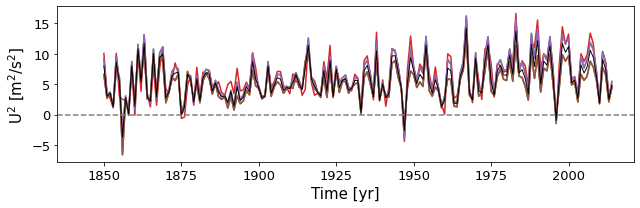

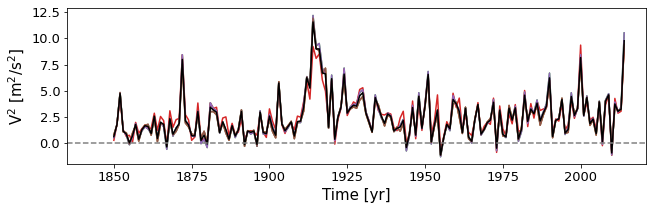

In [146]:
figs.plot_obs_wind_data(wind_data_20cr, model=model, data_type = '20cr', title = False, period = period)

#### Plot data locations

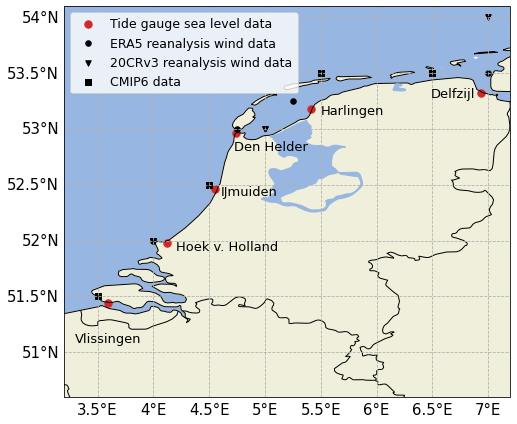

In [147]:
figs.plot_np_locations(title = False, period = period)

### Perform regression

In [148]:
results_20cr, timeseries_20cr, significance_20cr, r2_df = regres.regression_obs(wind_data_20cr, tg_data, wind_model = model, 
                                                                         data_type = '20cr', period = period)

In [149]:
r2_df

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,R$^2_{tr}$,R$^2_{adj}$,"R$^2_{adj, wind}$","R$^2_{adj, u^2}$","R$^2_{adj, v^2}$","R$^2_{adj, tr}$"
station,,,,,,,,,,
Vlissingen,0.907467,0.156332,0.142994,0.000302,0.887528,0.905172,0.135414,0.121746,-0.024484,0.884739
Hoek v. Holland,0.929541,0.186752,0.180348,0.001107,0.898961,0.927794,0.166589,0.160026,-0.023658,0.896456
Den Helder,0.855456,0.335437,0.331364,0.000533,0.764507,0.851872,0.31896,0.314787,-0.024247,0.758668
Delfzijl,0.889285,0.326084,0.325319,0.004908,0.798358,0.88654,0.309375,0.308592,-0.019764,0.793358
Harlingen,0.837818,0.414391,0.415878,0.008162,0.685475,0.833797,0.399872,0.401396,-0.016429,0.677677
IJmuiden,0.876889,0.17519,0.169655,0.001165,0.84835,0.873837,0.15474,0.149068,-0.023599,0.84459
Average,0.926466,0.272193,0.268919,0.001553,0.868237,0.924642,0.254148,0.250793,-0.023201,0.86497


In [150]:
results_20cr

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,u$^2$,v$^2$,trend
station,,,,,,,,,
Vlissingen,0.907467,0.156332,0.142994,0.000302,2.649577,-4.192991,1.409747,-0.540170,10.366245
Hoek v. Holland,0.929541,0.186752,0.180348,0.001107,2.506906,-2.437864,1.899883,-0.218946,11.187514
Den Helder,0.855456,0.335437,0.331364,0.000533,2.485852,-1.707396,2.159033,-0.212858,6.612498
Delfzijl,0.889285,0.326084,0.325319,0.004908,2.716130,-2.908354,2.590970,0.185363,8.533084
Harlingen,0.837818,0.414391,0.415878,0.008162,2.442283,-1.276144,2.537539,0.123743,5.524396
IJmuiden,0.876889,0.175190,0.169655,0.001165,3.051674,-4.249108,1.687138,-0.177852,10.012568
Average,0.926466,0.272193,0.268919,0.001553,2.095491,-2.789809,2.056543,-0.149635,8.690534


In [151]:
timeseries_20cr

Vlissingen                                            Hoek v. Holland  \
          u$^2$     v$^2$      trend      total wind total           u$^2$   
time                                                                         
1850   0.784828  0.427429 -17.846373 -16.634116   1.212257        1.057695   
1851  -1.197545  0.177431 -17.628734 -18.648848  -1.020114       -1.613903   
1852  -0.703445 -0.632895 -17.411096 -18.747436  -1.336340       -0.948016   
1853  -1.867566  0.354289 -17.193457 -18.706734  -1.513277       -2.516875   
1854   1.220681  0.377390 -16.975818 -15.377748   1.598070        1.645083   
...         ...       ...        ...        ...        ...             ...   
2010  -1.649112  0.835070  16.975818  16.161776  -0.814042       -2.222470   
2011   1.394563 -0.269152  17.193457  18.318868   1.125411        1.879421   
2012   0.713593 -0.186892  17.411096  17.937796   0.526701        0.961692   
2013  -1.487778 -0.199024  17.628734  15.941932  -1.686802       -2.005043   
2014  -0.285948 -1.844167  17.846373  15.716258  -2.130115       -0.385366   

                                                 ...  IJmuiden            \
         v$^2$      trend      total wind total  ...     u$^2$     v$^2$   
time                                             ...                       
1850  0.173248 -19.260258 -18.029315   1.230943  ...  0.939256  0.140732   
1851  0.071917 -19.025377 -20.567362  -1.541985  ... -1.433181  0.058419   
1852 -0.256530 -18.790495 -19.995041  -1.204545  ... -0.841859 -0.208382   
1853  0.143603 -18.555614 -20.928886  -2.373272  ... -2.235041  0.116650   
1854  0.152966 -18.320733 -16.522684   1.798049  ...  1.460870  0.124256   
...        ...        ...        ...        ...  ...       ...       ...   
2010  0.338476  18.320733  16.436739  -1.883993  ... -1.973602  0.274949   
2011 -0.109095  18.555614  20.325940   1.770326  ...  1.668967 -0.088619   
2012 -0.075752  18.790495  19.676435   0.885940  ...  0.854004 -0.061535   
2013 -0.080670  19.025377  16.939663  -2.085713  ... -1.780523 -0.065529   
2014 -0.747491  19.260258  18.127401  -1.132857  ... -0.342213 -0.607196   

                                        Average                       \
          trend      total wind total     u$^2$     v$^2$      trend   
time                                                                   
1850 -17.237489 -16.157501   1.079988  1.553847  0.133744 -14.961494   
1851 -17.027276 -18.402038  -1.374762 -1.759362  0.050467 -14.779037   
1852 -16.817062 -17.867304  -1.050241 -1.436242 -0.161384 -14.596579   
1853 -16.606849 -18.725239  -2.118390 -2.906328  0.095429 -14.414122   
1854 -16.396636 -14.811510   1.585126  1.956600  0.116669 -14.231665   
...         ...        ...        ...       ...       ...        ...   
2010  16.396636  14.697982  -1.698653 -2.485374  0.245719  14.231665   
2011  16.606849  18.187197   1.580348  2.264920 -0.090740  14.414122   
2012  16.817062  17.609532   0.792469  1.185129 -0.039480  14.596579   
2013  17.027276  15.181224  -1.846052 -2.097803 -0.054916  14.779037   
2014  17.237489  16.288079  -0.949410 -0.542653 -0.523373  14.961494   

                            
          total wind total  
time                        
1850 -13.273903   1.687591  
1851 -16.487932  -1.708895  
1852 -16.194205  -1.597625  
1853 -17.225021  -2.810899  
1854 -12.158396   2.073269  
...         ...        ...  
2010  11.992010  -2.239655  
2011  16.588302   2.174180  
2012  15.742229   1.145649  
2013  12.626318  -2.152719  
2014  13.895468  -1.066026  

[165 rows x 35 columns]

In [152]:
significance_20cr

,Vlissingen,Hoek v. Holland,Den Helder,Delfzijl,Harlingen,IJmuiden,Average
reggression_contributor,,,,,,,
u$^2$,True,True,True,True,True,True,True
v$^2$,False,False,False,False,False,False,False
trend,True,True,True,True,True,True,True
total,True,True,True,True,True,True,True
wind total,True,True,True,True,True,True,True


#### Plot regression results

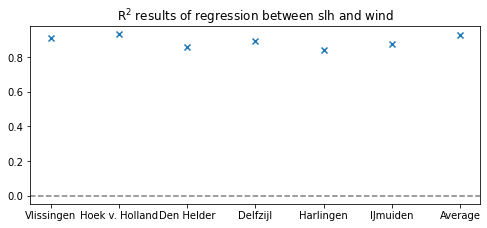

In [153]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2$', model, '20cr', period = period)

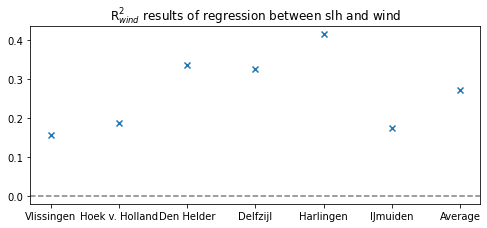

In [154]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{wind}$', model, '20cr', period = period)

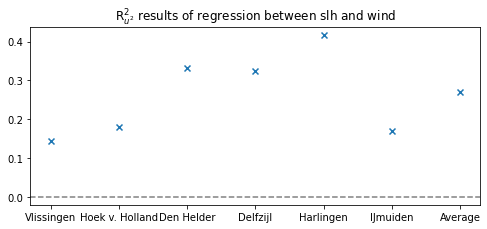

In [155]:
figs.plot_obs_result_per_station(results_20cr,'R$^2_{u^2}$', model, '20cr', period = period)

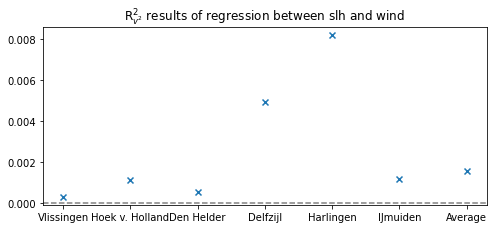

In [156]:
figs.plot_obs_result_per_station(results_20cr, 'R$^2_{v^2}$', model, '20cr', period = period)

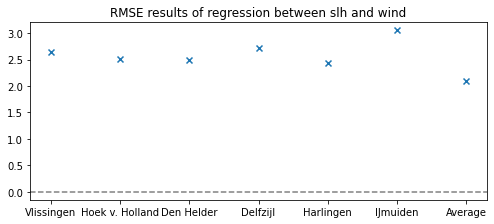

In [157]:
figs.plot_obs_result_per_station(results_20cr, 'RMSE', model, '20cr', period = period)

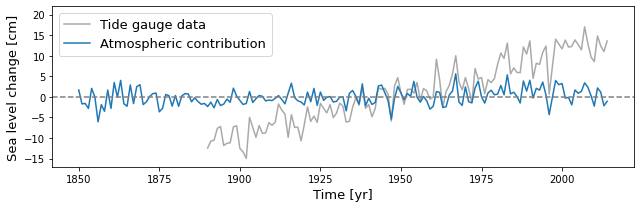

In [158]:
figs.plot_obs_timeseries_one_station_tg_ac(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

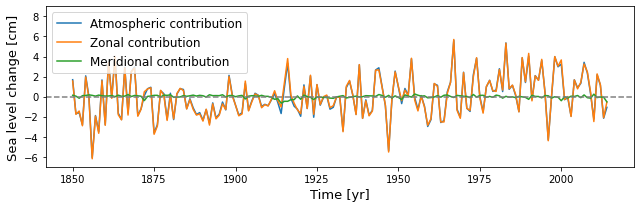

In [159]:
figs.plot_obs_timeseries_one_station_ac_u_v(tg_data, timeseries_20cr, 'Average', model, '20cr', title = False, period = period)

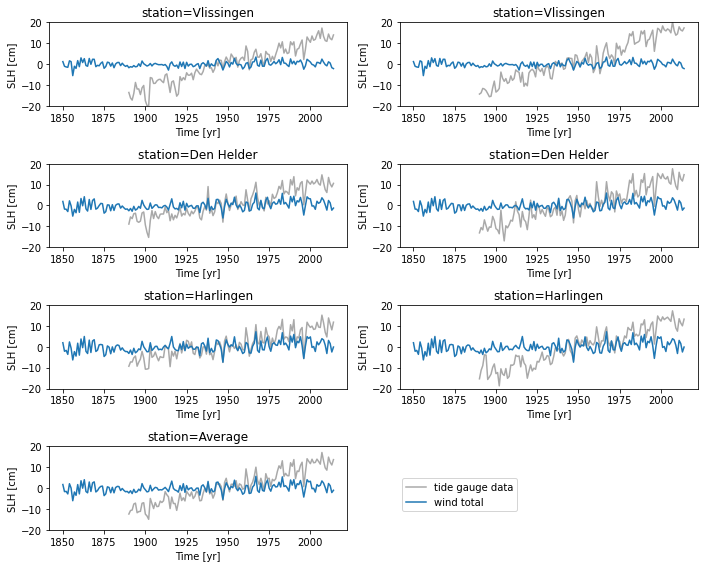

In [160]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['wind total'], model, '20cr', period = period)

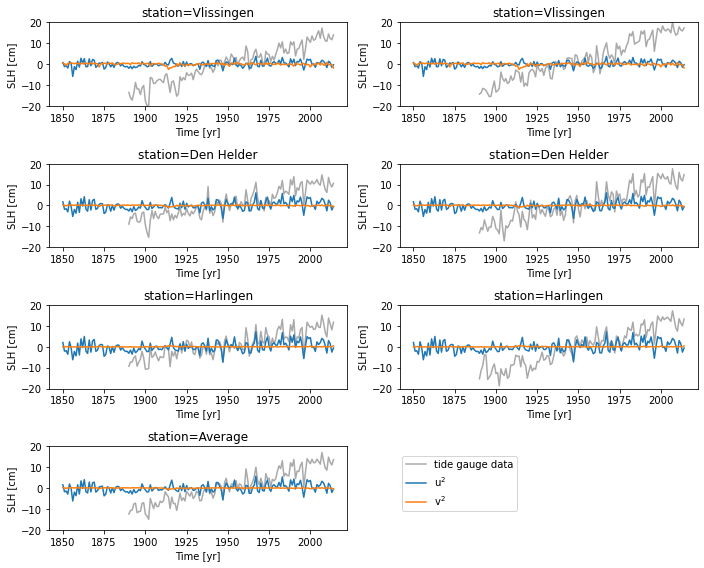

In [161]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$'], model, '20cr', period = period)

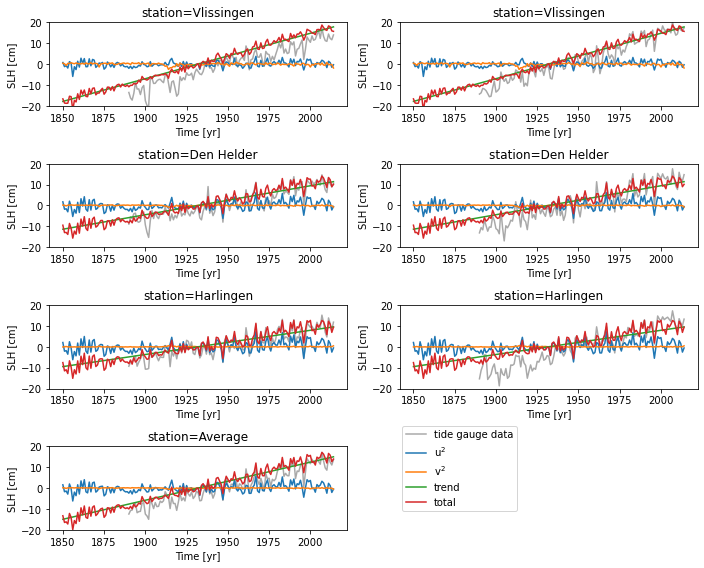

In [162]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries_20cr, ['u$^2$', 'v$^2$', 'trend', 'total'], model, '20cr', period = period)

#### Plot trends

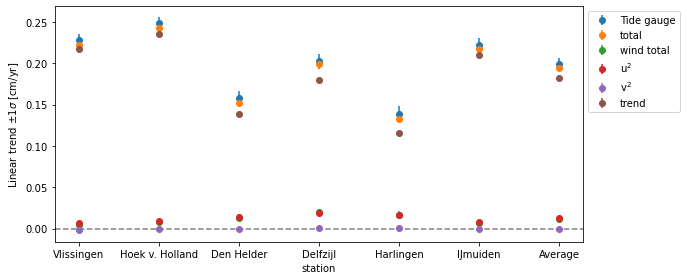

In [163]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$', 'trend'], 
                                            model, '20cr', period = period)

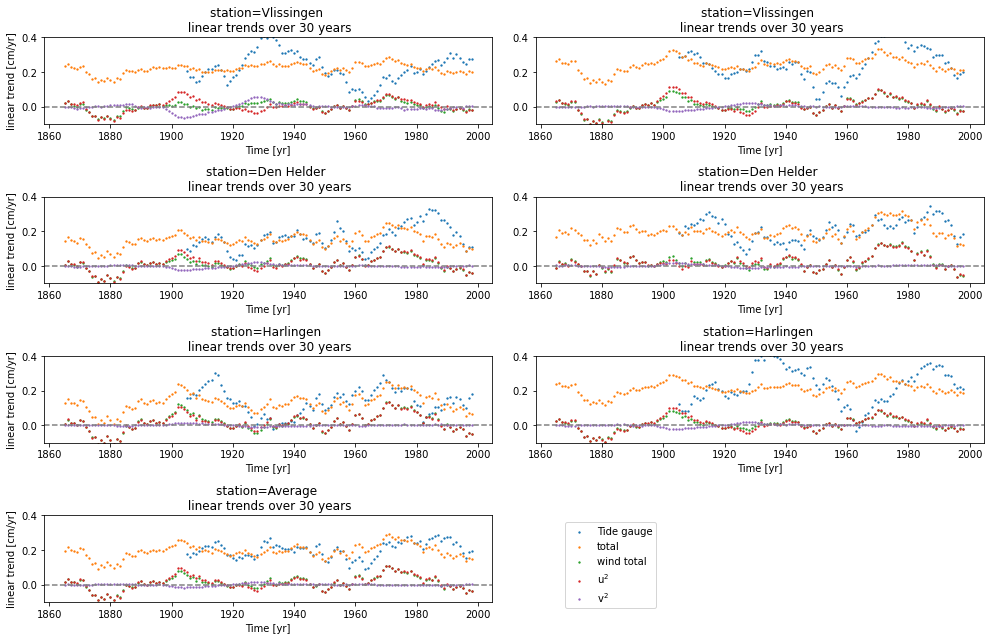

In [164]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries_20cr, ['total', 'wind total', 'u$^2$', 'v$^2$'], 30, 
                                                    model, '20cr', errorbar = False, period = period)

#### Calculate trends

In [167]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df = pd.DataFrame({'period':[f'{begin}-{end}'], 'trend': [np.nan], 'se': [np.nan]})
df = df.set_index('period')

df = pd.concat([df, df, df], keys = ['ERA5', '20CRv3', 'tg_data'], axis=1)

# ERA5 trends
df['ERA5', 'trend'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[begin:end].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).slope*10

# ERA5 standard errors
df['ERA5', 'se'][f'{begin}-{end}'] = linregress(timeseries_era5.loc[1950:2014].index, timeseries_era5['Average', 'wind total'].loc[1950:2014].values).stderr*10

# 20CRv3 trends
df['20CRv3', 'trend'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).slope*10

# 20CRv3 standard errors
df['20CRv3', 'se'][f'{begin}-{end}'] = linregress(timeseries_20cr.loc[1950:2014].index, timeseries_20cr['Average', 'wind total'].loc[1950:2014].values).stderr*10


# Tide gauge trends
df['tg_data', 'trend'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).slope*10

# Tide gauge standard errors
df['tg_data', 'se'][f'{begin}-{end}'] = linregress(tg_data.loc[1950:2014].index, tg_data['Average'].loc[1950:2014].values).stderr*10


df


ERA5              20CRv3             tg_data          
              trend        se     trend        se     trend        se
period                                                               
1850-2014  0.009395  0.149084  0.147832  0.139299  2.169399  0.200802